In [51]:
import tensorflow as tf
import numpy as np
from keras.utils import to_categorical
import pandas as pd
from keras.datasets import mnist

import matplotlib
import matplotlib.pyplot as plt

import random     
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [52]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


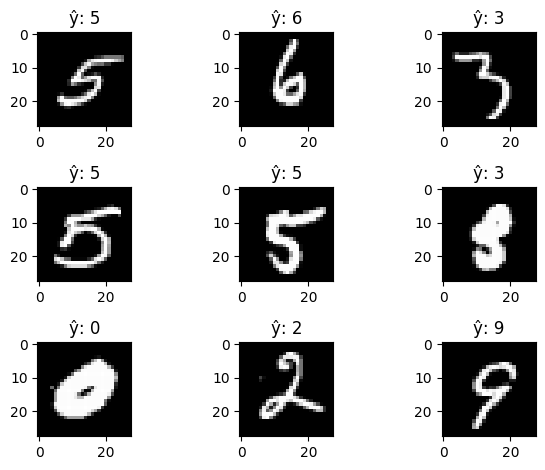

In [53]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("ŷ: {}".format(y_train[num]))
    
plt.tight_layout()

In [54]:
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_train /= 255
print("X_train shape", X_train.shape)

X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_test /= 255
print("X_test shape", X_test.shape)

X_train shape (60000, 784)
X_test shape (10000, 784)


In [55]:
CLASS_COUNT = 10
Y_train = to_categorical(y_train, CLASS_COUNT)
Y_test = to_categorical(y_test, CLASS_COUNT)

In [56]:
model = Sequential(
    [               
        tf.keras.Input(shape=(784,)),
        Dense(512, activation='relu', name='layer1'),
        Dense(512, activation='relu', name='layer2'),
        Dense(10, activation='softmax', name='layer3')
    ]
)                            

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 512)               401920    
                                                                 
 layer2 (Dense)              (None, 512)               262656    
                                                                 
 layer3 (Dense)              (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [57]:
#from keras.utils import plot_model
#plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
#from IPython.display import Image
#Image("model_chart.png")

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
BATCH_SIZE = 64
epochs = 11
model.fit(x=X_train, y=Y_train, batch_size=BATCH_SIZE, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/11
938/938 [==============================] - 17s 17ms/step - loss: 0.1942 - accuracy: 0.9418 - val_loss: 0.1113 - val_accuracy: 0.9627
Epoch 2/11
938/938 [==============================] - 15s 16ms/step - loss: 0.0766 - accuracy: 0.9761 - val_loss: 0.0780 - val_accuracy: 0.9756
Epoch 3/11
938/938 [==============================] - 14s 15ms/step - loss: 0.0527 - accuracy: 0.9834 - val_loss: 0.0784 - val_accuracy: 0.9765
Epoch 4/11
938/938 [==============================] - 14s 15ms/step - loss: 0.0390 - accuracy: 0.9873 - val_loss: 0.0773 - val_accuracy: 0.9783
Epoch 5/11
938/938 [==============================] - 14s 15ms/step - loss: 0.0293 - accuracy: 0.9908 - val_loss: 0.0705 - val_accuracy: 0.9805
Epoch 6/11
938/938 [==============================] - 14s 15ms/step - loss: 0.0252 - accuracy: 0.9912 - val_loss: 0.0704 - val_accuracy: 0.9802
Epoch 7/11
938/938 [==============================] - 15s 16ms/step - loss: 0.0226 - accuracy: 0.9925 - val_loss: 0.0824 - val_accuracy:

1/1 [==============================] - 0s 29ms/step


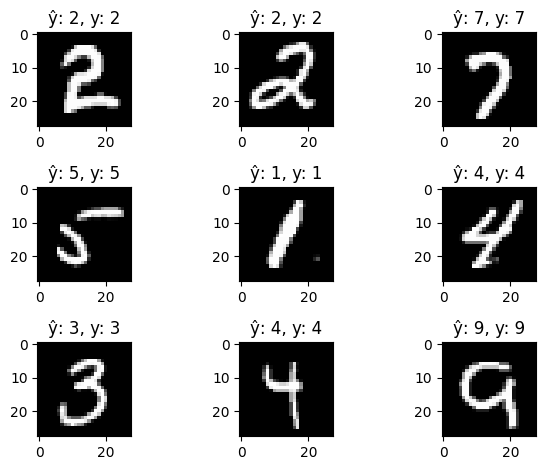

In [62]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    num = random.randint(0, len(X_test) - 1)
    plt.imshow(X_test[num].reshape(28, 28), cmap='gray', interpolation='none')
    prediction = model.predict(X_test[num].reshape(1, 784))
    f = open("output.txt", "a")
    f.write(str(X_test[num]))
    f.close()
    predicted_class = np.argmax(prediction)
    plt.title(f"ŷ: {y_test[num]}, y: {predicted_class}")
plt.tight_layout()
plt.show()